In [ ]:
import pandas as pd

# Chargement des fichiers CSV
critic_reviews_df = pd.read_csv('/content/rotten_tomatoes_critic_reviews.csv')
movies_df = pd.read_csv('/content/rotten_tomatoes_movies.csv')

# Affichage des premières lignes de chaque DataFrame pour examiner leur structure
(critic_reviews_df.head(), movies_df.head())

In [ ]:
# Réalisation d'une jointure interne sur la colonne 'rotten_tomatoes_link'
joined_df = pd.merge(critic_reviews_df, movies_df, on='rotten_tomatoes_link', how='inner')

# Affichage des premières lignes du DataFrame résultant pour vérifier la jointure
joined_df.head()


In [ ]:
joined_df.to_csv('joined_movie_reviews.csv', index=False)
#télécharger le csv

In [ ]:
joined_df.head()


In [21]:
joined_df.columns


Index(['rotten_tomatoes_link', 'critic_name', 'top_critic', 'publisher_name',
       'review_type', 'review_score', 'review_date', 'review_content',
       'movie_title', 'movie_info', 'critics_consensus', 'content_rating',
       'genres', 'directors', 'authors', 'actors', 'original_release_date',
       'streaming_release_date', 'runtime', 'production_company',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_status', 'audience_rating', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count'],
      dtype='object')

In [22]:
pip install gender-guesser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 kB 4.0 MB/s eta 0:00:00


In [33]:
import gender_guesser.detector as gender
import pandas as pd

# Chargement des données (ajustez le chemin selon votre environnement)
df = pd.read_csv('joined_movie_reviews.csv')

# Initialisation du détecteur de genre
d = gender.Detector()

# Extraction du premier nom et déduction du genre
df['first_name'] = df['critic_name'].str.split().str[0]
df['gender'] = df['first_name'].apply(lambda x: d.get_gender(x))

# Nettoyage des résultats de genre (optionnel)
df['gender'] = df['gender'].replace({'mostly_male': 'male', 'mostly_female': 'female', 'andy': 'unknown'})
# a faire sur les acteurs pas ca a cause des unkwnonwn

df.to_csv('joined_movie_reviews22.csv', index=False)

<ipython-input-33-c39cd4c55099>:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('joined_movie_reviews.csv')


In [24]:
df.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,movie_title,movie_info,...,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,first_name,gender
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Andrew,male
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff...",Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Louise,female
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,49.0,149.0,Spilled,53.0,254421.0,43,73,76,NaN,unknown
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Ben,male
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Ethan,male


In [25]:
# Calcul de la proportion de critiques "Fresh" et "Rotten" pour chaque genre
proportions = df.groupby('gender')['review_type'].value_counts(normalize=True).unstack().fillna(0)

print(proportions)


review_type     Fresh    Rotten
gender                         
female       0.631722  0.368278
male         0.596081  0.403919
unknown      0.613020  0.386980


In [46]:
df.actors


0        Logan Lerman, Brandon T. Jackson, Alexandra Da...
1        Logan Lerman, Brandon T. Jackson, Alexandra Da...
2        Logan Lerman, Brandon T. Jackson, Alexandra Da...
3        Logan Lerman, Brandon T. Jackson, Alexandra Da...
4        Logan Lerman, Brandon T. Jackson, Alexandra Da...
                               ...                        
93375    Adam Sandler, Drew Barrymore, Rob Schneider, S...
93376    Adam Sandler, Drew Barrymore, Rob Schneider, S...
93377    Adam Sandler, Drew Barrymore, Rob Schneider, S...
93378    Adam Sandler, Drew Barrymore, Rob Schneider, S...
93379    Adam Sandler, Drew Barrymore, Rob Schneider, S...
Name: actors, Length: 93380, dtype: object

In [ ]:
# Imaginons que 'df' est votre DataFrame et que 'actors' contient une liste d'acteurs pour chaque film.
# Vous devrez d'abord étendre cette liste avant d'appliquer le code suivant, ce qui est une étape non montrée ici.

# Supposons maintenant que chaque ligne de 'df' correspond à un acteur spécifique et à une critique de film.
# Calcul des proportions
proportions = df.groupby(['actors', 'gender'])['review_type'].value_counts(normalize=True).unstack().fillna(0)

print(proportions)


In [48]:
pip install pyvis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.4 MB/s eta 0:00:00


In [52]:
pip install plotly


In [59]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go



# Limiter l'analyse pour simplifier l'exemple
df_small = df.head(500)

# Création du graphe
G = nx.Graph()

# Ajouter des nœuds et des arêtes
for _, row in df_small.iterrows():
    actors = str(row['actors']).split(', ')
    review_type = row['review_type']
    for actor in actors:
        G.add_node(actor, type='actor')
        G.add_node(review_type, type='review_type')
        G.add_edge(actor, review_type)  # Connecte l'acteur et le type de critique

# Utilisation d'un layout de force-directed pour le positionnement des nœuds
pos = nx.spring_layout(G)

# Préparation des données de tracé pour Plotly
edge_x = []
edge_y = []
node_x = []
node_y = []
node_text = []
node_color = []

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

for node in G.nodes(data=True):
    x, y = pos[node[0]]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node[0])
    if node[1]['type'] == 'actor':
        node_color.append('blue')  # Par exemple, les acteurs en bleu
    else:
        node_color.append('red')  # Les types de critiques en rouge

# Création des tracés Plotly
edge_trace = go.Scatter(x=edge_x, y=edge_y, line=dict(width=0.5, color='#888'), mode='lines')
node_trace = go.Scatter(x=node_x, y=node_y, mode='markers', hoverinfo='text', text=node_text, marker=dict(color=node_color, size=10))

# Création de la figure Plotly
fig = go.Figure(data=[edge_trace, node_trace], layout=go.Layout(showlegend=False, hovermode='closest', xaxis=dict(showgrid=False, zeroline=False, showticklabels=False), yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

# Affichage du graphique
fig.show()



In [61]:
pip install plotly dash


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 14.5 MB/s eta 0:00:00


In [67]:
# Assurez-vous d'avoir installé Dash et Plotly : pip install dash plotly
import dash
import dash_core_components as dcc
import dash_html_components as html
from plotly.graph_objs import Bar

# Supposons que vous avez un DataFrame 'df_analysis' prêt à l'emploi
# df_analysis pourrait ressembler à : ['Genre', 'Critic_Sex', 'Review_Type', 'Count']

# Initialiser l'application Dash
app = dash.Dash(__name__)

# Définir la mise en page de l'application
app.layout = html.Div([
    html.H1("Analyse des Critiques de Films par Genre et Sexe du Critique"),

    # Filtre pour sélectionner un genre de film
    dcc.Dropdown(
        id='genre-filter',
        options=[{'label': gender, 'value': gender} for genre in df['gender'].unique()],
        value='All Genres',
        clearable=False
    ),

    # Emplacement pour le graphique de visualisation
    dcc.Graph(id='genre-critic-sex-chart')
])

# Callback pour mettre à jour le graphique en fonction du genre sélectionné
@app.callback(
    Output('genre-critic-sex-chart', 'figure'),
    [Input('genre-filter', 'value')]
)
def update_chart(selected_genre):
    filtered_df = df[df['genre'] == selected_genre] if selected_genre != 'All Genres' else df

    # Créer une visualisation avec Plotly Express
    fig = px.bar(filtered_df, x='film_title', y='count', color='critic_sex', barmode='group',
                 title='Nombre de Critiques par Sexe pour le Genre Sélectionné')

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


NameError: name 'Output' is not defined

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

# Création du graphe
G = nx.Graph()

# Ajout des nœuds et des arêtes basés sur votre DataFrame
# Par exemple, pour chaque paire acteur-type de critique :
for index, row in df.iterrows():
    actor = row['actor']  # Assurez-vous d'avoir isolé chaque acteur individuellement
    review_type = row['review_type']
    G.add_node(actor, role='actor')
    G.add_node(review_type, role='review_type')
    G.add_edge(actor, review_type)

# Utilisation de PyVis pour une visualisation interactive dans un navigateur
nt = Network(notebook=True)
nt.from_nx(G)
nt.show("actors_reviews.html")


In [26]:
pip install matplotlib seaborn


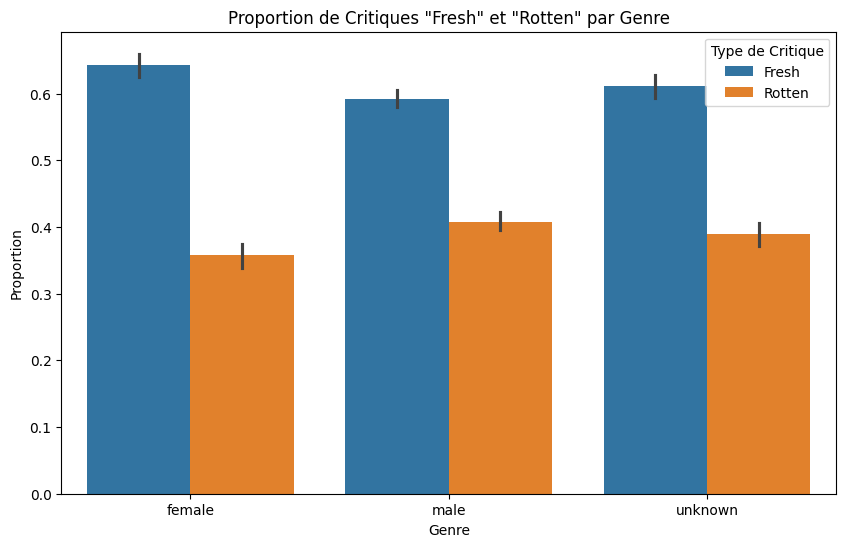

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assurez-vous d'avoir 'proportions' comme DataFrame de proportions calculées précédemment
# Le DataFrame 'proportions' devrait ressembler à quelque chose où l'index est 'gender'
# et les colonnes sont 'Fresh' et 'Rotten' représentant les proportions.

# Réinitialisation de l'index pour le rendre utilisable dans Seaborn
proportions_reset = proportions.reset_index()

# Transformation du DataFrame pour la visualisation
proportions_melted = proportions_reset.melt(id_vars='gender', value_vars=['Fresh', 'Rotten'], var_name='Review Type', value_name='Proportion')

# Création du graphique
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='Proportion', hue='Review Type', data=proportions_melted)

plt.title('Proportion de Critiques "Fresh" et "Rotten" par Genre')
plt.xlabel('Genre')
plt.ylabel('Proportion')
plt.legend(title='Type de Critique')

plt.show()


#voir avec les acteurs
#faire un ratio de femmes et d'hommes vis a vis des acteurs

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que 'proportions' est votre DataFrame de proportions calculées pour chaque acteur et sexe de critique
# Assurez-vous que 'proportions' a été recalculé comme suggéré précédemment

# Réinitialisation de l'index pour inclure 'actors' dans les données utilisables pour Seaborn
proportions_reset = proportions.reset_index()

# Si 'proportions_reset' contient beaucoup d'acteurs, vous pourriez vouloir limiter cette visualisation
# aux acteurs les plus fréquemment cités, ou agréger les données différemment.

# Transformation du DataFrame pour la visualisation
proportions_melted = proportions_reset.melt(id_vars=['actors', 'gender'], value_vars=['Fresh', 'Rotten'], var_name='Review Type', value_name='Proportion')

# Création du graphique
plt.figure(figsize=(10, 6))
sns.barplot(x='actors', y='Proportion', hue='Review Type', data=proportions_melted)

plt.title('Proportion de Critiques "Fresh" et "Rotten" par Acteur et Genre du Critique')
plt.xticks(rotation=90)  # Rotation des noms d'acteurs pour améliorer la lisibilité
plt.xlabel('Acteur')
plt.ylabel('Proportion')
plt.legend(title='Type de Critique')

plt.tight_layout()  # Ajuste automatiquement les sous-plots pour qu'ils rentrent dans la figure
plt.show()


<ipython-input-40-25ee199f04ec>:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


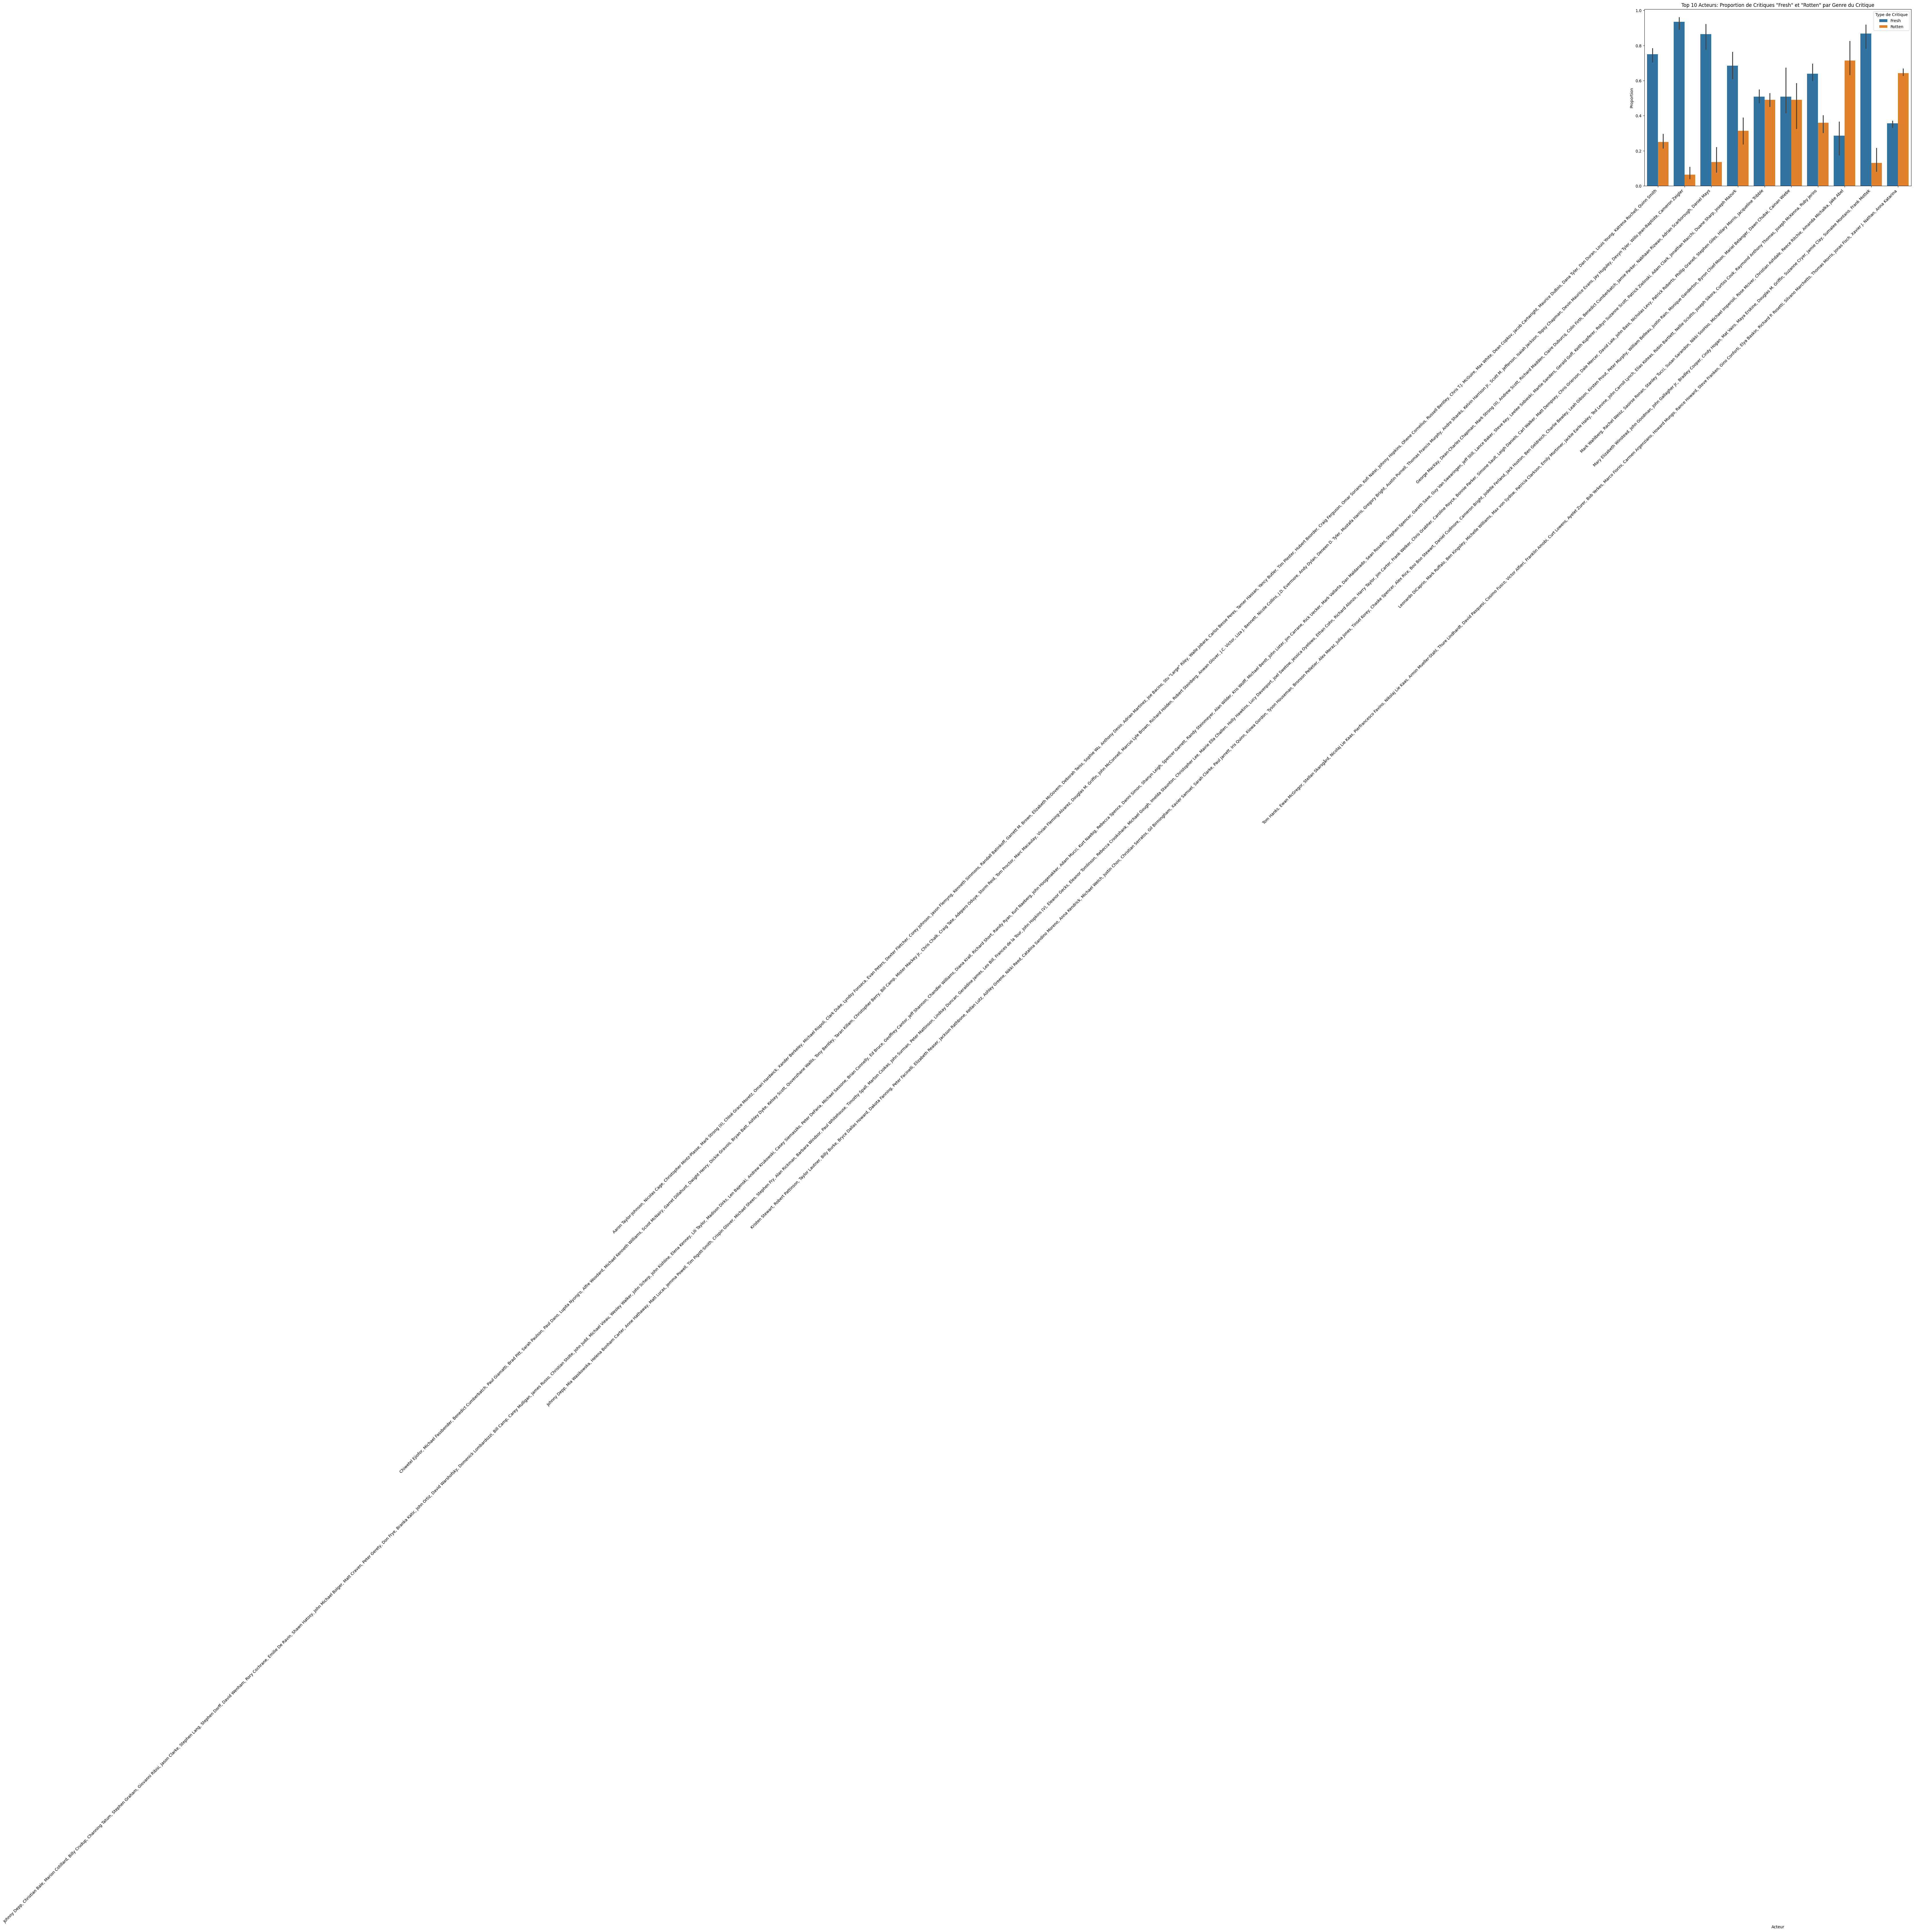

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul du nombre total de critiques pour chaque acteur
actor_counts = df['actors'].value_counts().nlargest(10)  # Remplacer df['actors'] par votre DataFrame approprié

# Filtrage du DataFrame pour inclure seulement ces acteurs
filtered_df = df[df['actors'].isin(actor_counts.index)]

# Recalcul des proportions pour ce sous-ensemble d'acteurs
proportions = filtered_df.groupby(['actors', 'gender'])['review_type'].value_counts(normalize=True).unstack().fillna(0).reset_index()

# Transformation du DataFrame pour la visualisation
proportions_melted = proportions.melt(id_vars=['actors', 'gender'], value_vars=['Fresh', 'Rotten'], var_name='Review Type', value_name='Proportion')

# Création du graphique
plt.figure(figsize=(12, 8))
sns.barplot(x='actors', y='Proportion', hue='Review Type', data=proportions_melted)
plt.title('Top 10 Acteurs: Proportion de Critiques "Fresh" et "Rotten" par Genre du Critique')
plt.xticks(rotation=45, ha="right")
plt.xlabel('Acteur')
plt.ylabel('Proportion')
plt.legend(title='Type de Critique')
plt.tight_layout()
plt.show()


In [ ]:
#remplacer les male et female dans par de stuples à coté de chaque nom c'est mieux plutot que mettre dans une nouvelle colonne

In [28]:
#2ème question

# Supposons que 'df' est votre DataFrame après avoir déduit le sexe

# Séparation des genres de films et expansion du DataFrame pour que chaque genre soit sur une ligne séparée
genres_expanded = df.drop('genres', axis=1).join(df['genres'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('genre'))

# Maintenant, vous pouvez compter le nombre de critiques par genre de film et par sexe
genre_gender_count = genres_expanded.groupby(['genre', 'gender']).size().unstack().fillna(0)


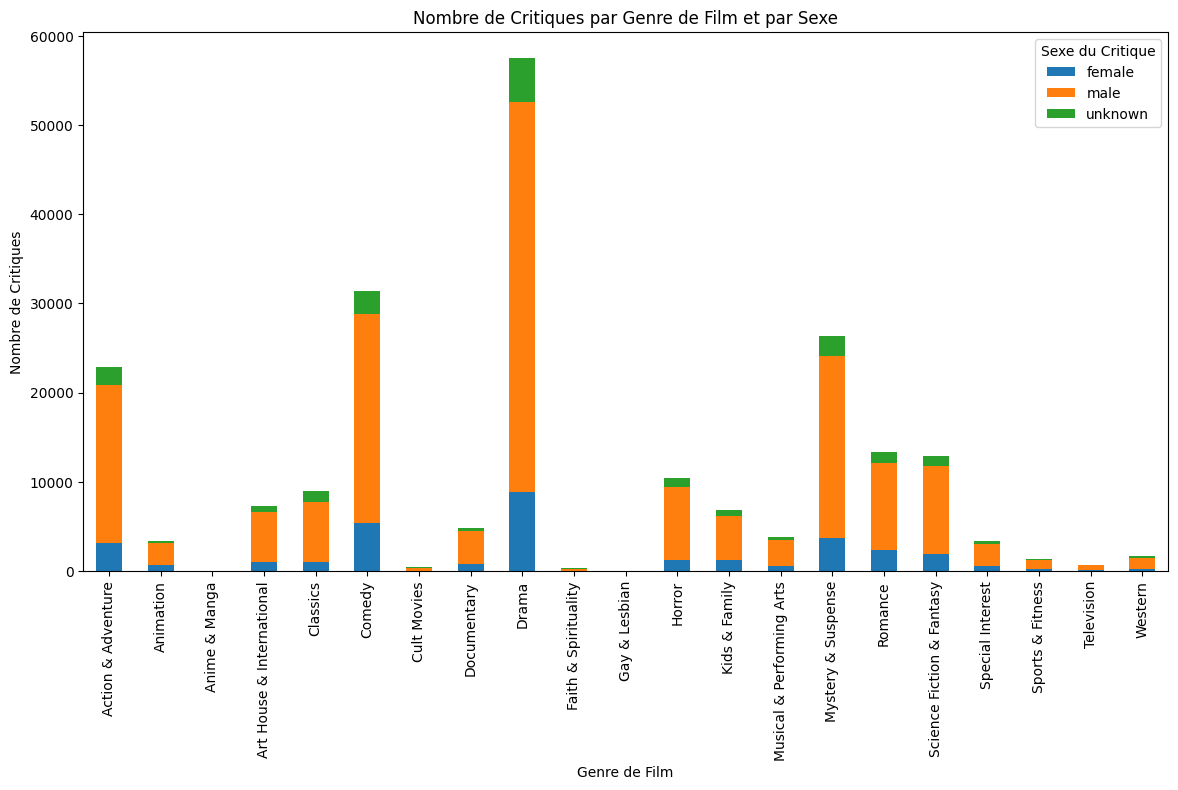

In [29]:
# Création d'un graphique à barres empilées
genre_gender_count.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.title('Nombre de Critiques par Genre de Film et par Sexe')
plt.xlabel('Genre de Film')
plt.ylabel('Nombre de Critiques')
plt.legend(title='Sexe du Critique')

plt.show()


In [30]:
pip install wordcloud


In [31]:
# Conversion des genres en chaînes et exclusion des valeurs manquantes pour les critiques masculines
male_genres = ' '.join(genres_expanded[(genres_expanded['gender'] == 'male') & (genres_expanded['genre'].notna())]['genre'].astype(str))

# Conversion des genres en chaînes et exclusion des valeurs manquantes pour les critiques féminines
female_genres = ' '.join(genres_expanded[(genres_expanded['gender'] == 'female') & (genres_expanded['genre'].notna())]['genre'].astype(str))



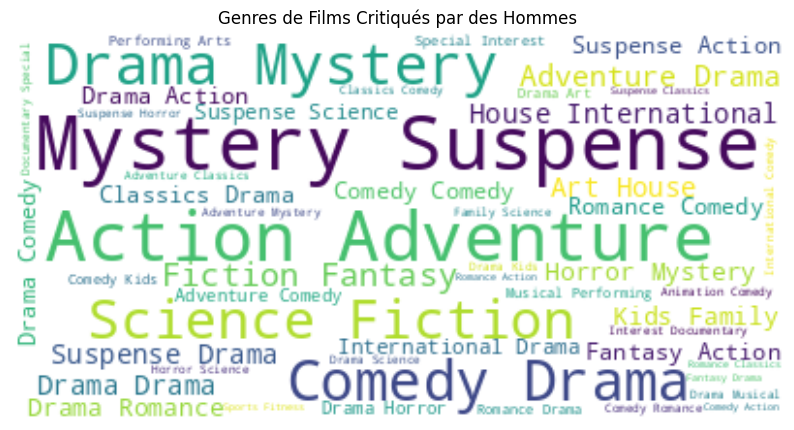

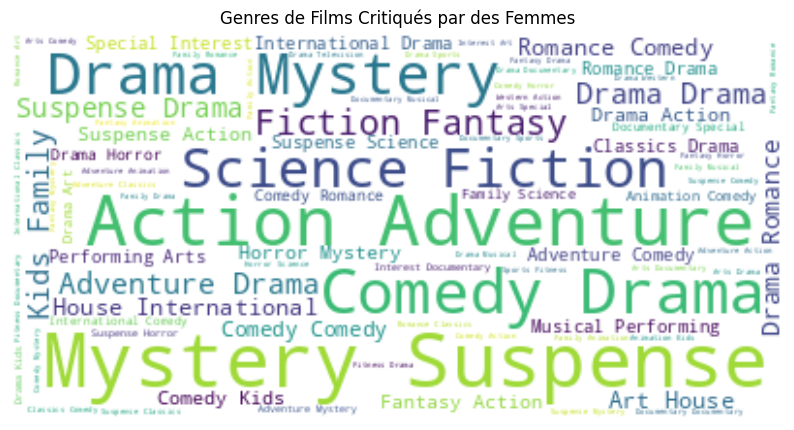

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Création et affichage d'un Word Cloud pour les critiques masculines
male_wc = WordCloud(background_color='white').generate(male_genres)
plt.figure(figsize=(10, 6))
plt.imshow(male_wc, interpolation='bilinear')
plt.title('Genres de Films Critiqués par des Hommes')
plt.axis('off')

# Création et affichage d'un Word Cloud pour les critiques féminines
female_wc = WordCloud(background_color='white').generate(female_genres)
plt.figure(figsize=(10, 6))
plt.imshow(female_wc, interpolation='bilinear')
plt.title('Genres de Films Critiqués par des Femmes')
plt.axis('off')

plt.show()


In [ ]:
#amélioration des graphiques avec Plotly